### Extractive and abstractive Summary

`Extractive summarization selects the salient sentences from the original document to form a summary` 

`abstractive summarization interprets the original document and generates the summary in its own words.`

#### 1.1. Data Pre-Processing Phase

It is the process of cleaning and transforming the raw source document to a more compatible data format prior to summarization. Examples of data pre-processing techniques are:

(1)Removal of noise data found in the document;

(2)Sentence and word tokenization;

(3) Removal of punctuation marks;

(4) Removal of stop words to remove frequently occurring words, such as (a), (an), (the), etc.;

(5 )Word stemming, which is the removal of suffixes and prefixes;

(6) Word lemmatization, which is the transformation of a word to its base structure, such as transforming the word “playing” to “play”;

(7) Part-of-speech tagging.


> In our approach, the extractive summarization problem was defined as a sentence selection problem given a document. The determination of which sentence should be included in the summary was based on three metrics:

-   Sentence Content Relevance Metric;
	- -   For sentence content relevance metric,use the TfidfVectorizer class to transform text into TF-IDF vectors and calculate the reconstruction error.
    
-   Sentence Novelty Metric;
	- se the BLEU score to measure the novelty of a sentence compared to the previous sentences in the summary.
    
-   Sentence Position Relevance Metric.
	- used TextRank algorithm, to use a dynamic weight calculation method to assign more weight to the initial sentences of the text.
		- Bulid a tokenization
		- use cosine similarity matrix 

##### BERTSUM

The paper you linked is about fine-tuning BERT for extractive summarization(https://web.stanford.edu/class/cs224n/reports/final_reports/report042.pdf)[1](https://web.stanford.edu/class/cs224n/reports/final_reports/report042.pdf). 


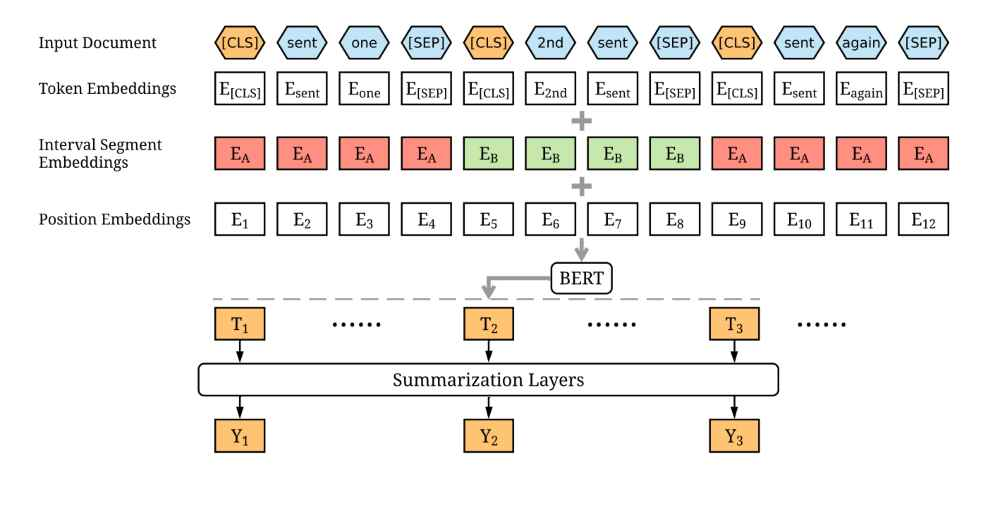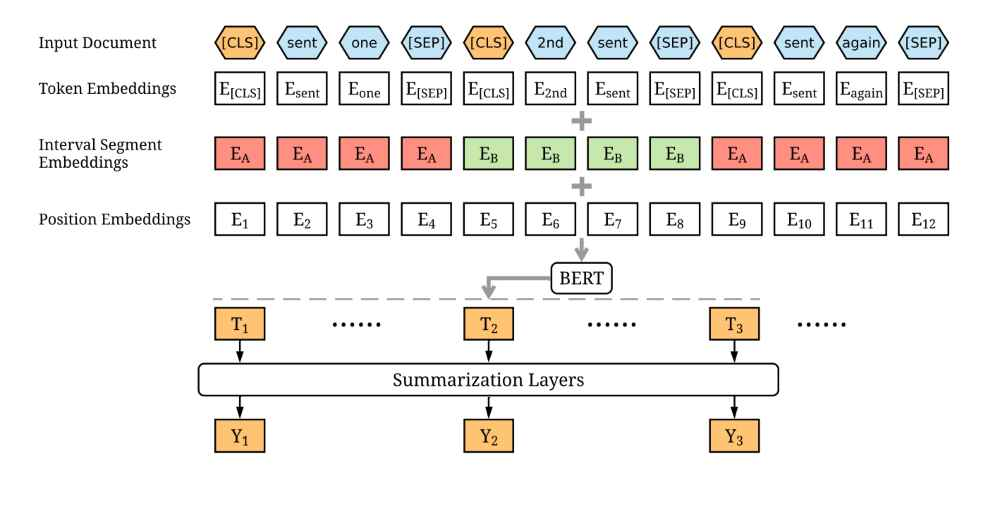



The main components are:

-   **A document encoder t**hat takes a document as input and produces sentence embeddings using BERT. The document is represented as a sequence of sentences, each prefixed with a [CLS] token and suffixed with a [SEP] token. The [CLS] token is used to aggregate the features of each sentence, and the [SEP] token is used to separate the sentences. 
- The document encoder also adds two extra features to the sentence embeddings: the `segment embeddings` and the `positional embeddings`. 
	- **The segment embedding**s indicate whether a sentence belongs to the first or the second half of the document, and the 
	- **positional embeddings i**ndicate the relative position of a sentence in the document.
-   **An inter-sentence Transformer** layer that takes the sentence embeddings from the document encoder and applies a self-attention mechanism to capture the relationships between sentences. The inter-sentence Transformer layer consists of a multi-head attention sub-layer and a feed-forward sub-layer, followed by layer normalization and residual connections.

-   **A sentence classifier that ta**kes the output of the inter-sentence Transformer layer and predicts a binary label for each sentence, indicating whether it should be included in the summary or not. **The sentence classifier uses a linear layer and a sigmoid activation function to produce the label probabilities.**

The model is trained by **minimizing the cross-entropy loss between the predicted labels and the ground truth labels**, which are obtained by a greedy algorithm that selects the sentences that maximize the ROUGE score with the reference summary. The model is fine-tuned on the CNN/Daily Mail and NYT datasets, which are preprocessed according to the BERT input format.

